#                       <h1><center>**REGULARIZATION**</center></h1>   


# **ABOUT THE FASHION MNIST DATASET**

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

# Labels

Each training and test example is assigned to one of the following labels:

- 0  T-shirt/top
- 1  Trouser
- 2  Pullover
- 3  Dress
- 4  Coat
- 5  Sandal
- 6  Shirt
- 7  Sneaker
- 8  Bag
- 9  Ankle boot

![](https://www.researchgate.net/profile/Saeed-Reza-Kheradpisheh/publication/342801790/figure/fig2/AS:911232181735425@1594266090934/Sample-images-from-Fashion-MNIST-dataset.png)


# **TOPICS IN THIS ASSIGNMENT**
- Importing and understanding dataset
- EDA
- Preparing data
- Building the model
- Compiling and fitting the model
- Prediction on test data
- Evaluating the model
- Regularization techniques
- Rebuilding the model using dropout
- Rebuilding the model using l2
- Rebuilding the model using l1
- Rebuilding the model using earlystopping


### **How To Load Dataset?**
- Documentation Link - https://www.tensorflow.org/api_docs/python/tf/keras/datasets
- Video link below

# **1. Importing & Understanding Data**

In [1]:
# Import fashion mnist from tensorflow.keras.datasets
from tensorflow.keras.datasets import mnist

# load the data using fashion_mnist.load_data and define train_images, train_labels, test_images, test_labels
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
# check the shape of train_images dataset
train_images.shape

(60000, 28, 28)

In [3]:
# check the shape of train_images single image (train_images[0])
train_images[0].shape

(28, 28)

In [4]:
# let's look at the first image which will show in the array form 
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

**Observation from the array output**
- You can see value in the array ranging from 0-255 depicting RGB color.

In [5]:
# check length of train_labels
len(train_labels)

60000

In [6]:
# check the labels of train data
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
# check shape of test data
test_images.shape

(10000, 28, 28)

In [8]:
# check the labels of test data
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

## **How to plot an image?**
- You can find a simple way to plot an image of MNIST dataset by watching the video below.

# 2. **EDA**

## **How to plot multiple images of the fashion MNIST?**
- Follow the comments below in the code to plot.

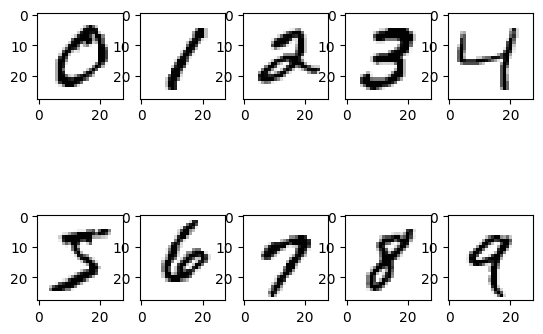

In [14]:
# importing pyplot and numpy for plotting images of 0-9
import matplotlib.pyplot as plt
import numpy as np

# defining subplots (2,5)
fig, ax = plt.subplots(2,5) # code here

# looping over ax.flatten(), and plotting each digit
for i, ax in enumerate(ax.flatten()):
    # choosing each digit occuring at its first instance using np.argwhere
    im_idx = np.argwhere(train_labels==i)[0][0]# code here
    # reshaping the selected digit to (28, 28) from (1, 28, 28)
    plottable_image = np.reshape(train_images[im_idx], (28,28))# code here 
    # now pass this plottable_image to ax.imshow
    ax.imshow(plottable_image, cmap='gray_r')

# **3. Preparing the data**

## **How to prepare the image for model building?**
- Follow the comments below to understand the process.

In [16]:
# reshape train_images from (60000, 28, 28) to (60000, 28*28)
train_images = train_images.reshape((60000, 28*28))

# convert dtype of train_images from uint8 to float32 
train_images = train_images.astype('float32') / 255

# reshape train_images from (10000, 28, 28) to (10000, 28*28)
test_images = test_images.reshape((10000, 28*28))

# convert dtype of test_images from uint8 to float32 
test_images = test_images.astype('float32') / 255


# **4.Model 1: Building the model**

![](https://curiousily.com/static/2da120014faf76c47fa4294c7206e291/9d0b7/deep-neural-net.jpg)

### **How To Build Model?**
- Documentation Link - https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
- Watch the video below & follow the steps in code cells later.

**Let's import necessary libraries and define our model by following the comments**

In [17]:
# importing keras and layers from tensorflow
from tensorflow import keras
from tensorflow.keras import layers

# define the model and its network architecture
# define three dense layers having first two layers with 512 neurons & activation='relu'
# define third layer with 10 neurons & activation = 'softmax'
model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# **5. Compiling & fitting the model**

**In the next cell, we will compile our model.**

In [18]:
# compile the model with optimizer='rmsprop', loss='sparse_categorical_crossentropy', & metrics=['accuracy']
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Then we will fit our model**

In [19]:
# fit the model with epochs=10, batch_size=128
model.fit(train_images,train_labels, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 4s 6ms/step - loss: 0.2298 - accuracy: 0.9298
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0814 - accuracy: 0.9747
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0536 - accuracy: 0.9832
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0368 - accuracy: 0.9880
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0273 - accuracy: 0.9915
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0199 - accuracy: 0.9935
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0153 - accuracy: 0.9952
Epoch 8/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0113 - accuracy: 0.9965
Epoch 9/10
469/469 [==============================] - 4s 7ms/step - loss: 0.0097 - accuracy: 0.9968
Epoch 10/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0091 - accuracy: 0.9968

# **6. Prediction on test data**

**In the next cell, we will take first 10 images of test data**

In [20]:
# define a variable test_digits and store the first 10 images of test data
test_digits = test_images[0:10]

**Then we will predict on those 10 images**

In [21]:
# predict the test_digits using our model
predictions = model.predict(test_digits)

1/1 [==============================] - 0s 208ms/step


**We will check prediction on first image in next cell**


In [22]:
# check the first image prediction from predictions
predictions[0]

array([7.2958742e-14, 5.0590743e-11, 3.3063247e-11, 9.0601765e-10,
       2.7753126e-15, 1.3115564e-13, 1.2100767e-18, 1.0000000e+00,
       4.1150815e-13, 8.5560575e-10], dtype=float32)

**Previous output shows probability of first image being either one of 10 products. For example, probability of first image being 0 is 8.8619967e-10 which is very very low.**

In [23]:
# checking the index having maximum prediction 
predictions[0].argmax()

7

**In next cell, we can see the maximum prediction for first image is 0.99 at index 9..**

In [24]:
# checking the index value having maximum prediction
predictions[0][7]

1.0

**In next cell, we are confirming whether our prediction is right or wrong by checking label.**

In [25]:
# checking the label for that index having maximum prediction
test_labels[0]

7

# **7. Evaluating the model**

**Now we evaluate our model on unseen data, which is test set.**

In [26]:
# check the loss and accuracy for test data using model.evaluate
test_loss, test_acc = model.evaluate(test_images, test_labels)# code here

313/313 [==============================] - 1s 2ms/step - loss: 0.0859 - accuracy: 0.9814


In [27]:
# print test accuracy
print(f"test_acc: {test_acc}")

test_acc: 0.9814000129699707


## **Observation from evaluation**
- We can see that our train accuracy is 91.01% and our test accuracy is 86.11% which clearly shows the case of overfitting. 

# **REGULARIZATION TECHNIQUES**

## **What is Regularization?**: It is a technique which makes slight modifications to the learning algorithm such that the model generalizes better. It is a way to overcome overfitting problem in machine learning/deep learning problem. This in turn improves the model’s performance on the unseen data as well.

## **Overfittng:** It is a situation where your model performed exceptionally well on train data but was not able to predict test data. 

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/04/Screen-Shot-2018-04-03-at-7.52.01-PM-e1522832332857.png)

## **How do we deal with reglarization?**

There are multiple ways to deal with regularization
- **1. Dropouts**
- **2. L2 & L1 regularization**
- **3. Early stopping**
- **4. Data augmentation**
- **5. Tweaking the architecture**

We have covered 5th tweaking the architecture method for regularization in our previous assignment of "Training Neural Networks". Data augmentation (4th) method will be covered in a separate assignment in computer vision. 

## **Here we will cover first 3 ways mentioned above to show you how you can avoid overfitting.**

# **Dropouts**

Dropout technique works by randomly reducing the number of interconnecting neurons within a neural network. At every training step, each neuron has a chance of being left out, or rather, dropped out of the collated contribution from connected neurons.
This technique minimizes overfitting because each neuron becomes independently sufficient, in the sense that the neurons within the layers learn weight values that are not based on the cooperation of its neighbouring neurons.

![](https://i.stack.imgur.com/Njnu4.png)

## **Dropout in implementation**
**Check the doxcumentation of dropout - https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout**

![](https://www.upgrad.com/blog/wp-content/uploads/2020/10/num-5.png)

In [28]:
# define the 2nd model and its network architecture
# define three dense layers having first two layers with 512 neurons & activation='relu'
# define third layer with 10 neurons & activation = 'softmax'
# add 2 dropout with value 0.3 (one each after first two dense layers)
from keras.layers.core import Dropout
model2 = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax'),
]) # code here

In [29]:
# compile the model with optimizer='rmsprop', loss='sparse_categorical_crossentropy', & metrics=['accuracy']
model2.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [30]:
# fit the model with epochs=10, batch_size=128
model2.fit(train_images,train_labels, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 4s 8ms/step - loss: 0.2755 - accuracy: 0.9147
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1181 - accuracy: 0.9642
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0875 - accuracy: 0.9732
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0708 - accuracy: 0.9786
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0614 - accuracy: 0.9813
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0532 - accuracy: 0.9840
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0472 - accuracy: 0.9856
Epoch 8/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0403 - accuracy: 0.9873
Epoch 9/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0373 - accuracy: 0.9883
Epoch 10/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0337 - accuracy: 0.989

In [31]:
# check the loss and accuracy for test data using model.evaluate
test_loss, test_acc = model.evaluate(test_images, test_labels)# code here

313/313 [==============================] - 1s 2ms/step - loss: 0.0859 - accuracy: 0.9814


## **Observation from evaluation**
- We can see that our train accuracy is 88.32% and our test accuracy is 88.22% which clearly shows how well dropout dealt with overfitting.  

# **L2 Regularization**

L2 regularization forces weights toward zero but it does not make them exactly zero. L2 regularization acts like a force that removes a small percentage of weights at each iteration. Therefore, weights will never be equal to zero. There is an additional parameter to tune the L2 regularization term which is called regularization rate (lambda).

**Note: Choosing an optimal value for lambda is important. If lambda is too high, the model becomes too simple and tends to underfit. On the other hand, if lambda is too low, the effect of regulatization becomes negligible and the model is likely to overfit. If lambda is set to zero, then regularization will be completely removed (high risk of overfitting!).**

![](https://www.tutorialexample.com/wp-content/uploads/2019/11/l2-regularization.png)

## **L2 Regularization in implementation**

**Check l2 regularization documentation - https://www.tensorflow.org/api_docs/python/tf/keras/regularizers/L2**

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTHsa7YeYQ4AwkZRGN4JXU9D5b-0cy-qusgjw&usqp=CAU)

In [33]:
# import regularizers from keras
from tensorflow.keras import regularizers

# define the 3nd model and its network architecture
# define three dense layers having first two layers with 512 neurons , activation='relu', & kernel_regularizer=regularizers.l2(0.0008)
# define third layer with 10 neurons & activation = 'softmax'
model3 = keras.Sequential([
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0008)),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0008)),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax'),
])

In [34]:
# compile the model with optimizer='rmsprop', loss='sparse_categorical_crossentropy', & metrics=['accuracy']

model3.compile(optimizer="rmsprop",
 loss="sparse_categorical_crossentropy",
 metrics=["accuracy"])

In [35]:
# fit the model with epochs=10, batch_size=128

model3.fit(train_images, train_labels, batch_size=128, epochs=10)

Epoch 1/10
469/469 [==============================] - 4s 7ms/step - loss: 0.7500 - accuracy: 0.9104
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.3242 - accuracy: 0.9544
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2560 - accuracy: 0.9602
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2333 - accuracy: 0.9633
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2206 - accuracy: 0.9631
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.2118 - accuracy: 0.9656
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.2074 - accuracy: 0.9649
Epoch 8/10
469/469 [==============================] - 4s 8ms/step - loss: 0.2021 - accuracy: 0.9662
Epoch 9/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1985 - accuracy: 0.9669
Epoch 10/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1930 - accuracy: 0.9679

In [36]:
# check the loss and accuracy for test data using model.evaluate
test_loss, test_acc = model.evaluate(test_images, test_labels) # code here

313/313 [==============================] - 1s 2ms/step - loss: 0.0859 - accuracy: 0.9814


## **Observation from evaluation**
- We can see that our train accuracy is 88.25% and our test accuracy is 87.33% which shows how well l2 regularization worked with overfitting but it's not better than dropout. We can still see some overfitting.  

# **L1 Regularization**

It adds an L1 penalty that is equal to the absolute value of the magnitude of coefficient, or simply restricting the size of coefficients.

![](https://miro.medium.com/max/550/1*-LydhQEDyg-4yy5hGEj5wA.png)

## **L1 regularization in implementation**

**Check l1 regularization documentation - https://www.tensorflow.org/api_docs/python/tf/keras/regularizers/L1**

![](https://www.oreilly.com/library/view/hands-on-machine-learning/9781788393485/assets/54e4fb02-51be-487d-a0d9-a4bbf6682839.png)

In [ ]:
# define the 4th model and its network architecture
# define three dense layers having first two layers with 512 neurons , activation='relu', & kernel_regularizer=regularizers.l1(0.0008)
# define third layer with 10 neurons & activation = 'softmax'




In [ ]:
# compile the model with optimizer='rmsprop', loss='sparse_categorical_crossentropy', & metrics=['accuracy']



In [ ]:
# fit the model with epochs=10, batch_size=128



Epoch 1/10
469/469 [==============================] - 10s 20ms/step - loss: 2.9857 - accuracy: 0.7411
Epoch 2/10
469/469 [==============================] - 9s 19ms/step - loss: 1.0575 - accuracy: 0.8026
Epoch 3/10
469/469 [==============================] - 11s 22ms/step - loss: 0.9609 - accuracy: 0.8181
Epoch 4/10
469/469 [==============================] - 9s 19ms/step - loss: 0.9164 - accuracy: 0.8260
Epoch 5/10
469/469 [==============================] - 9s 19ms/step - loss: 0.8891 - accuracy: 0.8313
Epoch 6/10
469/469 [==============================] - 9s 19ms/step - loss: 0.8743 - accuracy: 0.8342
Epoch 7/10
469/469 [==============================] - 9s 20ms/step - loss: 0.8603 - accuracy: 0.8386
Epoch 8/10
469/469 [==============================] - 9s 20ms/step - loss: 0.8522 - accuracy: 0.8399
Epoch 9/10
469/469 [==============================] - 9s 20ms/step - loss: 0.8450 - accuracy: 0.8413
Epoch 10/10
469/469 [==============================] - 9s 20ms/step - loss: 0.8392 - accu

In [ ]:
# check the loss and accuracy for test data using model.evaluate



313/313 [==============================] - 2s 4ms/step - loss: 0.8673 - accuracy: 0.8308


## **Observation from evaluation**
- We can see that our train accuracy is 84.34% and our test accuracy is 83.08% which shows how our training accuracy dropped from 88.32% to 84.3% and our test accuracy dropped from 88.22% to 83.08% as compared to our 2nd model. It does reduce overfitting as compared to our first model, but it did not perform well as compared to our 2nd model and 3rd model.  

# **Early Stopping**

**What is early stopping?** - Early stopping is a method that allows you to specify an arbitrary large number of training epochs and stop training once the model performance stops improving on a hold out validation dataset.

**Why we use early stopping?** - Too many epochs can lead to overfitting of the training dataset, whereas too few may result in an underfit model. 



![](https://miro.medium.com/max/567/1*2BvEinjHM4SXt2ge0MOi4w.png)

## **Early stopping in implementation**
**early stopping documentation link - https://keras.io/api/callbacks/early_stopping/**

![](https://www.markiiisys.com/wp-content/uploads/2020/08/Screen-Shot-2020-08-26-at-10.33.35-AM-1024x341.png)

In [37]:
# import tensorflow as tf
import tensorflow as tf

# define callbacks variable and import earlystopping with monitor='loss', patience=2
callbacks = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)# code here 

# define the 5th model and its network architecture
# define three dense layers having first two layers with 512 neurons & activation='relu'
# define third layer with 10 neurons & activation = 'softmax'

model4 = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax'),
])

In [38]:
# compile the model with optimizer='rmsprop', loss='sparse_categorical_crossentropy', & metrics=['accuracy']

model4.compile(optimizer="rmsprop",
 loss="sparse_categorical_crossentropy",
 metrics=["accuracy"])

In [41]:
# fit the model with epochs=10, batch_size=128

model4.fit(train_images, train_labels, callbacks=[callbacks], batch_size=128, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0169 - accuracy: 0.9948 - val_loss: 0.0823 - val_accuracy: 0.9855
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0167 - accuracy: 0.9949 - val_loss: 0.0872 - val_accuracy: 0.9841
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0152 - accuracy: 0.9952 - val_loss: 0.0806 - val_accuracy: 0.9858
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0152 - accuracy: 0.9949 - val_loss: 0.0849 - val_accuracy: 0.9851
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0146 - accuracy: 0.9953 - val_loss: 0.0843 - val_accuracy: 0.9850
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0135 - accuracy: 0.9959 - val_loss: 0.0795 - val_accuracy: 0.9857
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0148 - accuracy: 0.9955 - val_loss: 0.0887 - val_accuracy: 0.9854
Epoch 

## **Observation from evaluation**
- We can see that our train accuracy is 91.22% and our test accuracy is 88.43% which shows how well early stopping method worked with overfitting but it's not better than dropout. We can still see some overfitting. However our test accuracy is better than dropout test accuracy. In terms of accuracy it is better but in terms of generalization, our dropout model which is 2nd model is best.

# **Summary**

In this assignment, we learnt how we can implement multiple methods to deal with overfitting. We learnt the implementation of dropout, l2 , l1, early stopping methods of regularization.

Now you can play and tweak the parameters to get more insights from these methods. 
